In [2]:
from model_train import Model_Trainer
from od import Object_Detection
import os
import  matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import random

from skimage.io import imread
from sound import play

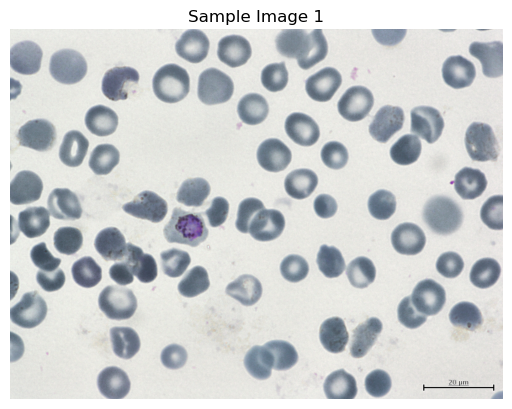

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator LinearSVC from version 0.24.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


The detected image is:


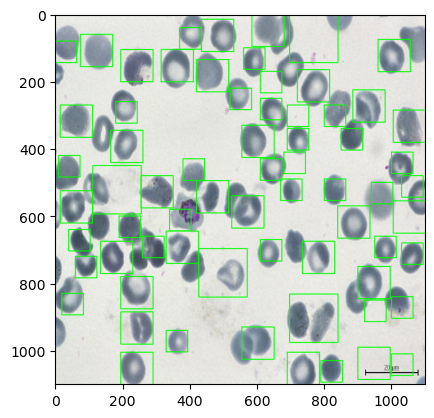

In [3]:
all_images = os.listdir(r"C:\Users\Bioimaging Lab\Desktop\Python Practice\Thesis\Yolo\datasets\cell\malaria\malaria\images")
folder = r'C:\Users\Bioimaging Lab\Desktop\Python Practice\Thesis\Yolo\datasets\cell\malaria\malaria\images'
samples = random.sample(all_images, 3)


sample_url = [os.path.join(folder, samples[i]) for i in range(len(samples))]


sample1 = imread(sample_url[0])
imshow(sample1)
plt.title('Sample Image 1')
plt.axis('off')
plt.show()

od = Object_Detection()
param = {'resize_image' : True,
        'resize_size' : (1100,1100),
         'dwn_scale' : 1.5,
         'scale' : 0,
         'fig_size': (10,10),
         'non_max_overlapThresh' : 0.01,
         'confidence_score' : 2,
         'step_size': 10,
         'orientations': 9,
        'pixels_per_cell' : (8, 8),
        'cells_per_block' : (2, 2),
        'threshold' : .3
        }
od.load_param(param, sample_url[0], 'model_r6.npy', 'scalar_r6.npy')
od.detect()

In [ ]:
f = plt.figure(figsize= (10,10))
ax = f.add_subplot(111)
od.modify_detect(image_size = (1100,1100), downscale=1.2, dcs_fn_thres = 1.5)
ax.imshow(od.resized)



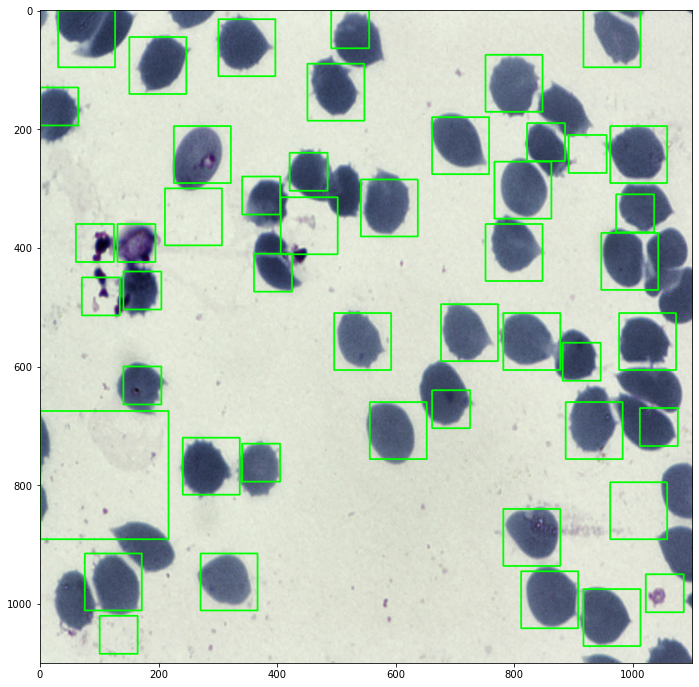

In [9]:
plt.figure(figsize =(12,12))
plt.imshow(od.resized)

Import 3 sample images

In [ ]:

pos_im_path = r"C:\Users\Bioimaging Lab\Desktop\Python Practice\Thesis\Yolo\datasets\cell\malaria\extracted_cells"
neg_im_path1 = r"C:\Users\Bioimaging Lab\Desktop\Python Practice\Thesis\Yolo\datasets\cell\fungi_good_background\cropped"
neg_im_path2 = r"C:\Users\Bioimaging Lab\Desktop\Python Practice\Thesis\Yolo\datasets\cell\jagadeesh_new_data\Cropped Images"



pos_images = random.sample(os.listdir(pos_im_path), 10000)
neg_images1 = os.listdir(neg_im_path1)
neg_images2 = os.listdir(neg_im_path2)

print(f"The number of negative images 1 is: {len(neg_images1)}\n\
and negative images 2 is: {len(neg_images2)}")
neg_images = [os.path.join(neg_im_path1, neg_images1[i]) for i in range(len(neg_images1))]
for i in range(len(neg_images2)):
    neg_images.append(os.path.join(neg_im_path2, neg_images2[i]))
print(f"The total images are now: {len(neg_images)}")

pos_images = [os.path.join(pos_im_path, pos_images[i]) for i in range(len(pos_images))]

neg_images = random.sample(neg_images, 500)
pos_images = random.sample(pos_images, 500)


mt = Model_Trainer(pos_images, neg_images, custom_images = True )
mt.create_image_dataset(custom_images = True)

params = {
          'number_of_orientations': 9,        # 6 - 12
          'pixels_per_cell': (8,8),                # 8, 16
          'cells_per_block': (2,2),                # 1, 2
          'do_transform_sqrt': True
                    }

mt.extract_features(params, method = 'hog')

mt.model_train()
mt.save_models('model_r6', "scalar_r6")

In [ ]:
from playsound import playsound

file_path = r"C:\Users\Bioimaging Lab\Music\sample.wav"
playsound(file_path)

#### I have defined my object Parameters.
Following parameters needs to be tested:
1. Image Resize size
2. Downscale Value
3. non max overlap thershold
4. Confidence Score
5. Threshold

## Modifying the image size - Resizing the image

The detected image is:
The detected image is:
The detected image is:
The detected image is:


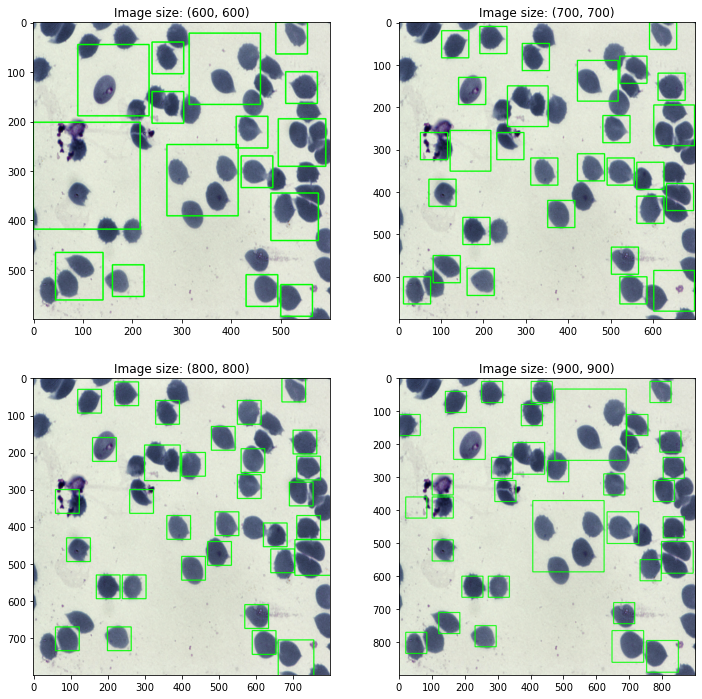

In [10]:
folder = r'C:\Users\Bioimaging Lab\Desktop\Python Practice\Thesis\Yolo\HOG and SVM\cell auto labelling\Sorted Code\Figures'
s = 500
plt.figure(figsize = (12,12))
for i in range(1,5):
    plt.subplot(2,2,i)
    s += 100
    od.modify_detect(image_size = (s,s))
    plt.title(f'Image size: ({s}, {s})')
plt.savefig(os.path.join(folder, 'modify_size1'))

The detected image is:
The detected image is:
The detected image is:
The detected image is:


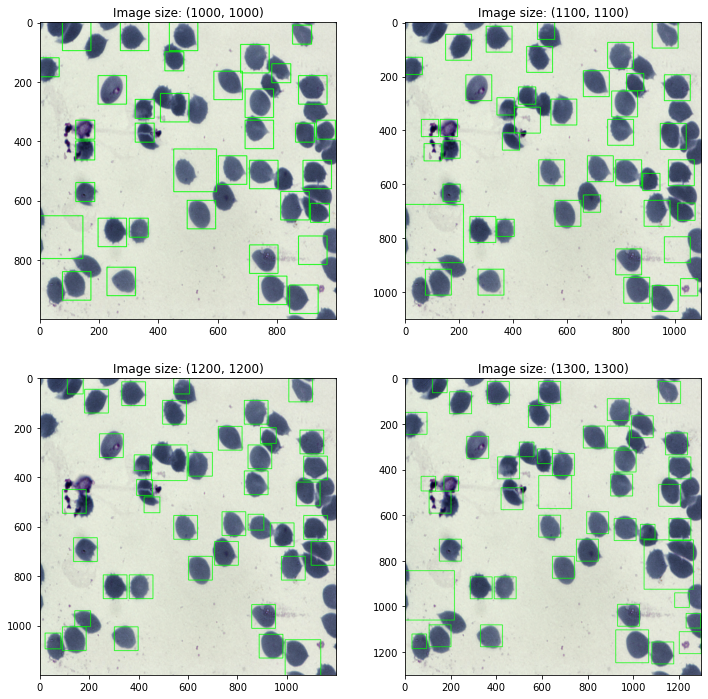

In [11]:

s = 900
plt.figure(figsize = (12,12))
for i in range(1,5):
    plt.subplot(2,2,i)
    s += 100
    od.modify_detect(image_size = (s,s))
    plt.title(f'Image size: ({s}, {s})')

plt.savefig(os.path.join(folder, 'modify_size'))

The detected image is:
The detected image is:
The detected image is:
The detected image is:


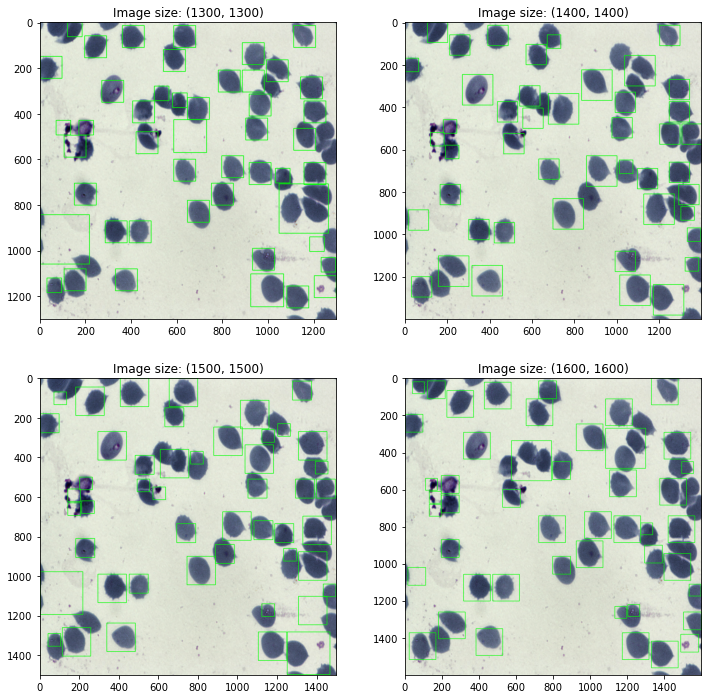

In [12]:
s = 1200
plt.figure(figsize = (12,12))
for i in range(1,5):
    plt.subplot(2,2,i)
    s += 100
    od.modify_detect(image_size = (s,s))
    plt.title(f'Image size: ({s}, {s})')
plt.savefig(os.path.join(folder, 'modify_size2'))

### Size : 1100x1100 to 1200 x 1200 looks suitable

### Modifying Downscale Value

The detected image is:
The detected image is:
The detected image is:
The detected image is:


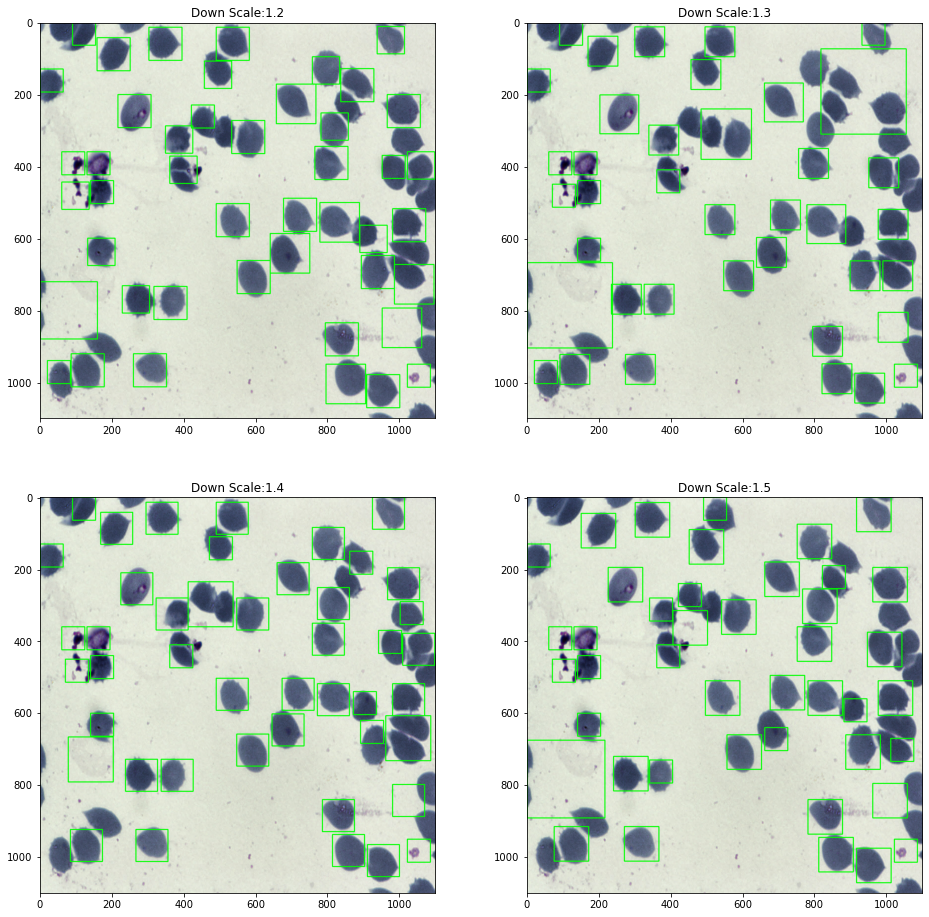

<Figure size 432x288 with 0 Axes>

In [13]:
plt.figure(figsize = (16,16))
d = 1.1
for i in range(1,5):
    plt.subplot(2,2,i)
    d += 0.1
    d = round(d, 2)
    od.modify_detect(image_size = (1100,1100), downscale=d)
    plt.title(f'Down Scale:{d}')
    plt.imshow(od.resized)
    
plt.show()


## Downscale value of 1.3-1.4 looks optimal, now changing the threshold value

The detected image is:
The detected image is:
The detected image is:
The detected image is:


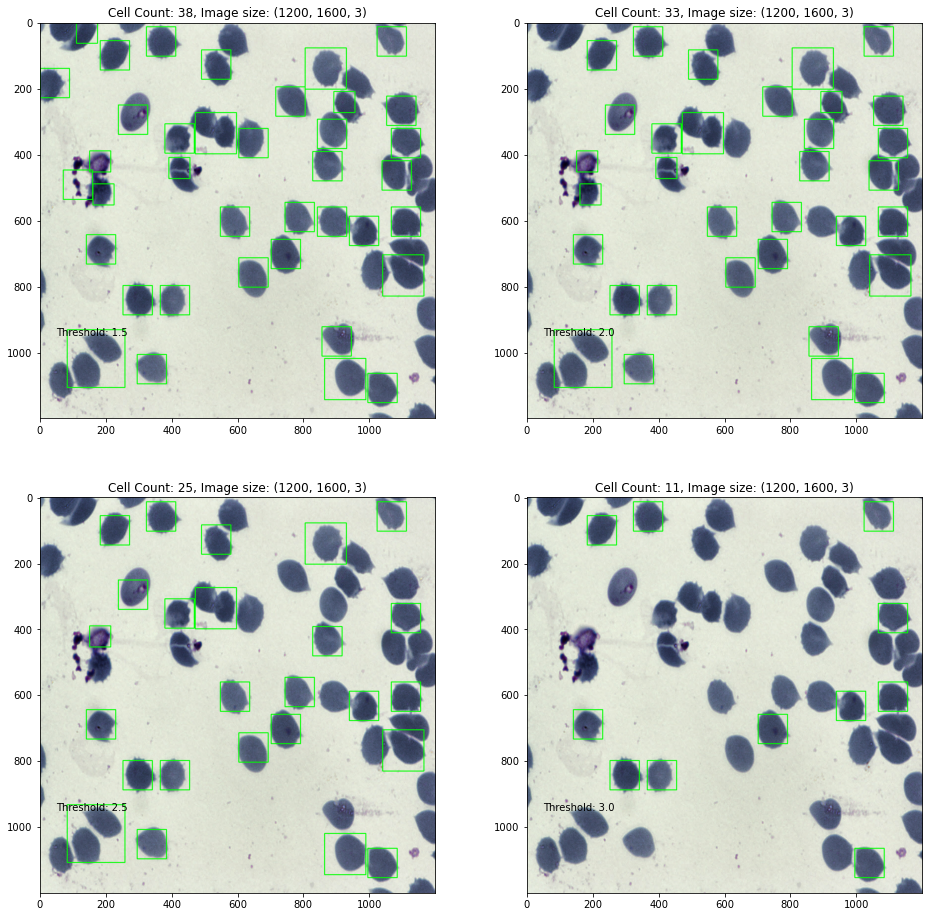

In [15]:
plt.figure(figsize = (16,16))
t = 1
for i in range(1,5):
    plt.subplot(2,2,i)
    t += 0.5
    t = round(t, 2)
    od.modify_detect(image_size = (1200,1200), downscale=1.4, dcs_fn_thres = t)
    plt.text(50, 950, f'Threshold: {t}')
    plt.title(f'Cell Count: {od.count}, Image size: {od.image_size}')

plt.savefig(os.path.join(folder, 'Threshold.png'))    
plt.show()


The detected image is:
The detected image is:
The detected image is:
The detected image is:


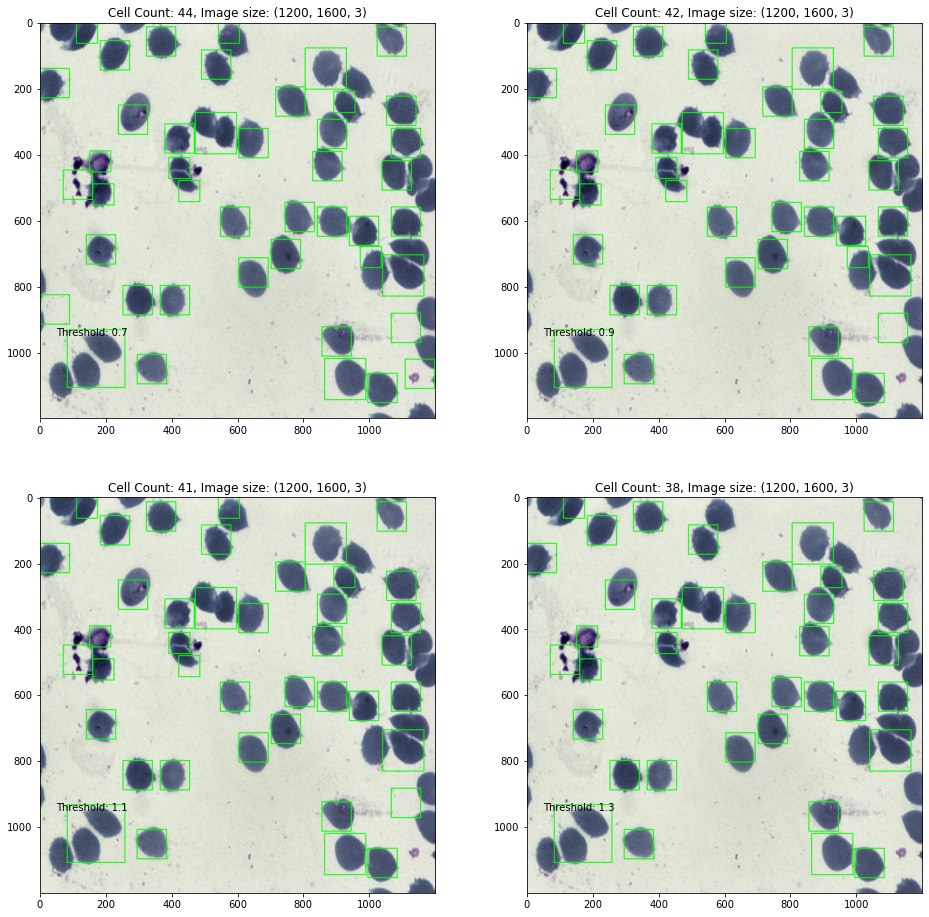

In [16]:
plt.figure(figsize = (16,16))
t = 0.5
for i in range(1,5):
    plt.subplot(2,2,i)
    t += 0.2
    t = round(t, 2)
    od.modify_detect(image_size = (1200,1200), downscale=1.4, dcs_fn_thres = t)
    plt.text(50, 950, f'Threshold: {t}')
    plt.title(f'Cell Count: {od.count}, Image size: {od.image_size}')

plt.savefig(os.path.join(folder, 'Threshold_2.png'))    
plt.show()


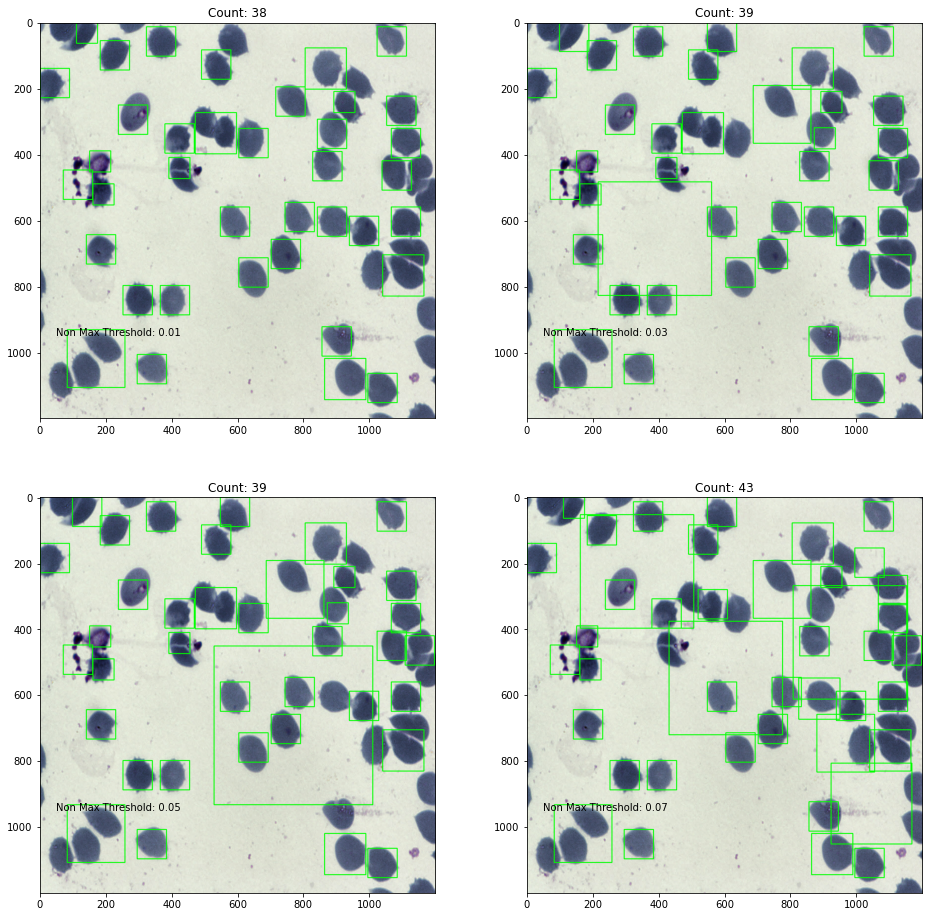

In [20]:
plt.figure(figsize = (16,16))
t = 0.01
for i in range(1,5):
    plt.subplot(2,2,i)
    od.modify_non_max_threshold(t)
    od.count = len(od.pick)
    plt.title(f'Count: {od.count}')
    plt.text(50, 950, f'Non Max Threshold: {t}')
    t += 0.02
    t = round(t, 2)
plt.savefig(os.path.join(folder, 'Non_max_Threshold_1.png'))    
plt.show()


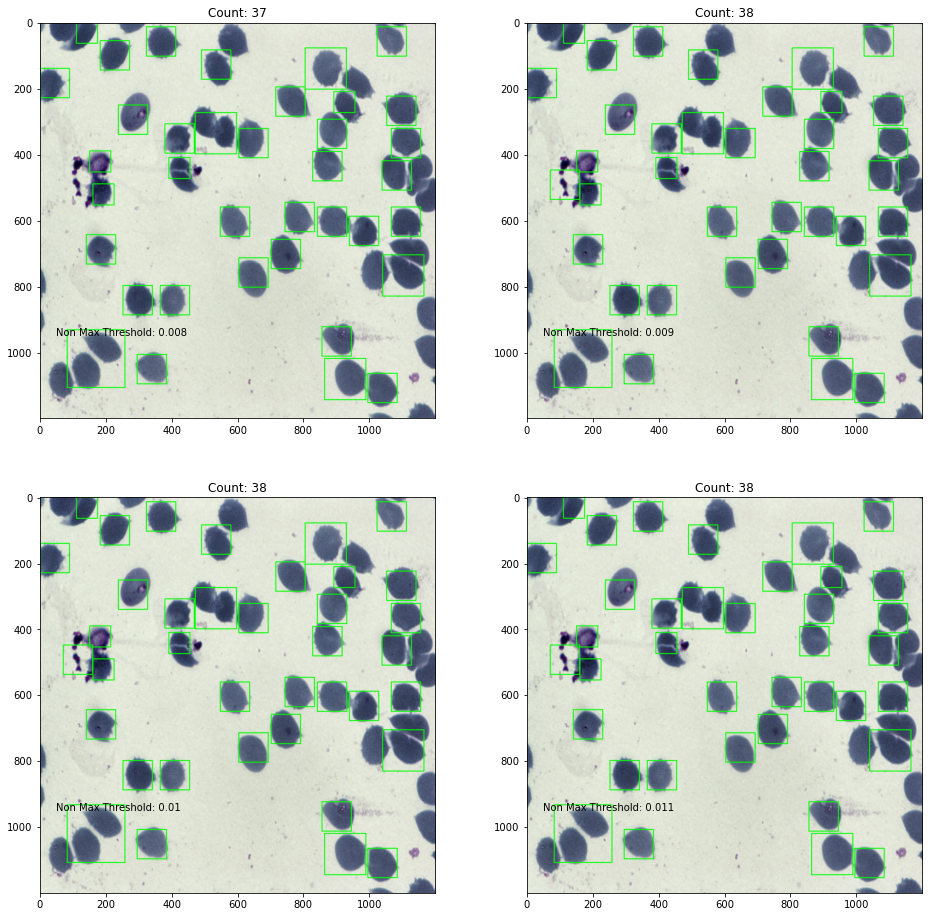

In [24]:
plt.figure(figsize = (16,16))
t = 0.008
for i in range(1,5):
    plt.subplot(2,2,i)
    od.modify_non_max_threshold(t)
    od.count = len(od.pick)
    plt.title(f'Count: {od.count}')
    plt.text(50, 950, f'Non Max Threshold: {t}')
    t += 0.001
    t = round(t, 3)
plt.savefig(os.path.join(folder, 'Non_max_Threshold_2.png'))    
plt.show()


## Non Max threshold of 0.008 is working fine

Now I will try a different approach, where I will take maximum number of detections, which means maximum number of bounding boxes but then I will try to filter them through confidence score and non max Threshold

The detected image is:


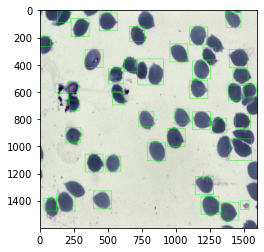

In [25]:
od.modify_detect(image_size=(1600, 1600),
                 sw_step_size=10,
                 downscale=1.2,
                 dcs_fn_thres=2,
                 non_max_threshold=0.001,
                 feature='hog')

Text(0.5, 1.0, 'Non max threshold value: 0.001, Cell Count: 42')

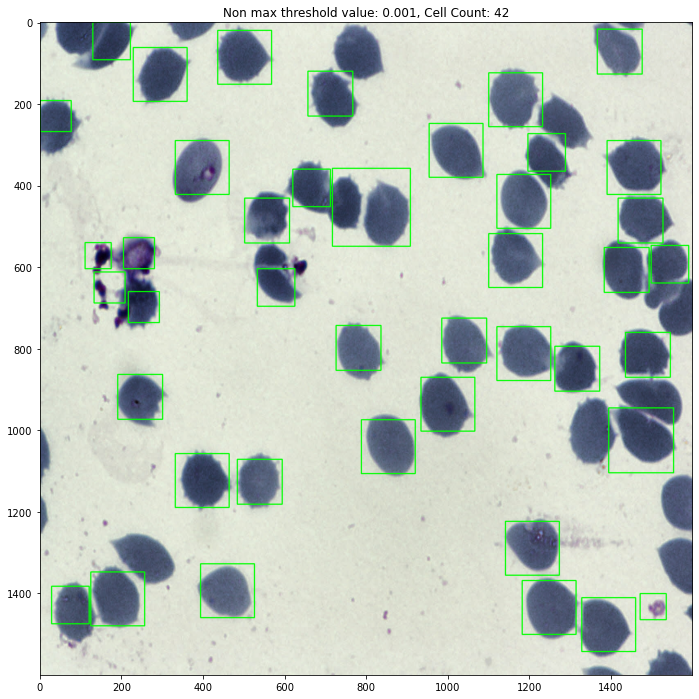

In [56]:
v = 0.001
plt.figure(figsize = (12,12))
od.modify_non_max_threshold(v)
plt.title(f'Non max threshold value: {v}, Cell Count: {od.count}')

In [70]:
import mahotas as mh
from mahotas.features import surf
from sklearn.cluster import KMeans as kmeans
from matplotlib import colormaps as cm
import numpy as np
import cv2

folder = r'C:\Users\Bioimaging Lab\Desktop\Python Practice\Thesis\Yolo\datasets\cell\malaria\extracted_cells'
folder2 = r'C:\Users\Bioimaging Lab\Desktop\Python Practice\Thesis\Yolo\datasets\cell\fungi_good_background\cropped'

f = mh.imread(os.path.join(folder, 'image0_4.jpg'), as_grey = True)
f = cv2.resize(f, (200,200))

sample2 = mh.imread(sample_url[1], as_grey = True)
#imshow(sample2)

spoints_o = surf.surf(f)
descrs = spoints_o[:,5:]

descrs.shape
#k = 2
#values = kmeans(n_clusters = k).fit(descrs).labels_
#colors = np.array([(255-52*i, 25+52*i, 37**i % 101) for i in range(k)])


#temp = surf.show_surf(sample2, spoints_o)

#imshow(temp)




(92, 65)

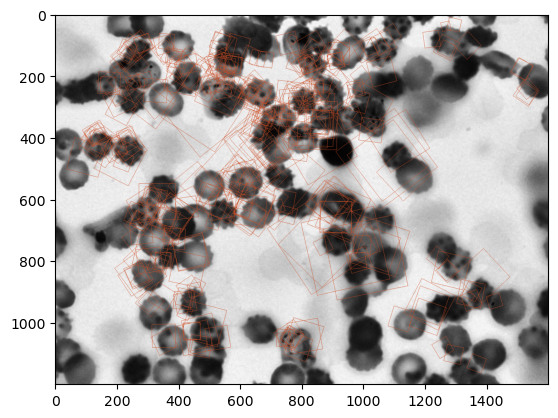

In [61]:
n = 1
filtered_spoints = spoints_o[values == n ]
filtered_values = values[values == n]

temp = surf.show_surf(sample2, filtered_spoints, filtered_values, colors)

plt.imshow(temp)

## Training model with SURF features

In [1]:
pos_im_path = r"C:\Users\Bioimaging Lab\Desktop\Python Practice\Thesis\Yolo\datasets\cell\malaria\extracted_cells"
neg_im_path1 = r"C:\Users\Bioimaging Lab\Desktop\Python Practice\Thesis\Yolo\datasets\cell\fungi_good_background\cropped"
neg_im_path = r"C:\Users\Bioimaging Lab\Desktop\Python Practice\Thesis\Yolo\datasets\cell\jagadeesh_new_data\Cropped Images"

from model_train import Model_Trainer

mt = Model_Trainer(pos_im_path, neg_im_path, test_mode = False)
mt.create_image_dataset(resize = False)
mt.extract_features(method = 'surf')

mt.model_train()

Here are the number of images found: 

No of positive samples:  31692
No of negative sample:  2400


Do you want to change no. of pos and neg samples: 
Reply with y or n 


All pos and neg image path loaded

Creating image dataset
Image Dataset created, stored in variable "self.data"
Extracting features started
(34087,)
(34087, 70)
Features extracted and saved in following urls: 
self.hog_images
self.processed_data
self.x_train etc.
 Training Linear SVM classifier...


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


 Training Completed, Time taken is :  1.1
 Evaluating classifier on test data ...
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       491
           1       0.99      1.00      0.99      6327

    accuracy                           0.99      6818
   macro avg       0.97      0.96      0.96      6818
weighted avg       0.99      0.99      0.99      6818



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [2]:
mt.save_models('model_surf_r1', 'scaler_surf_r1')

## Object Detection

In [1]:
from od import Object_Detection
import os
import random

all_images = os.listdir(r"C:\Users\Bioimaging Lab\Desktop\Python Practice\Thesis\Yolo\datasets\cell\malaria\malaria\images")
folder = r'C:\Users\Bioimaging Lab\Desktop\Python Practice\Thesis\Yolo\datasets\cell\malaria\malaria\images'
samples = random.sample(all_images, 3)
sample_url = [os.path.join(folder, samples[i]) for i in range(len(samples))]



In [ ]:
from skimage.feature import hog
from skimage.transform import pyramid_gaussian
from skimage.io import imread
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from skimage import color
from imutils.object_detection import non_max_suppression
import imutils
import numpy as np
import argparse
import cv2
import os
import glob
from PIL import Image # This will be used to read/modify images (can be done via OpenCV too)
from numpy import *
import matplotlib.pyplot as plt
import time
import mahotas as mh
from mahotas.features import surf
from sklearn.decomposition import PCA






resize_image = True
resize_size = (1024,1024)
dwn_scale = 4
scale = 0
resize_image = True
resize_size = (1024,1024)
dwn_scale = 4
scale = 0
detections = []
fig_size = (10,10)
non_max_overlapThresh = .001
confidence_score = 2



class Object_Detection:
    def __init__(self):
        self.resize_image = None
        self.resized = None
        self.resize_size = (900,900)
        self.dwn_scale = None
        self.scale = None
        self.detections = []
        self.fig_size = (10,10)
        self.non_max_overlapThresh = None
        self.confidence_score = None
        self.image = None
        self.image_size = None
        self.step_size = None
        self.orientations = 9
        self.pixels_per_cell = (8, 8)
        self.cells_per_block = (2, 2)
        self.threshold = .3
        self.features = None
        self.model = None
        self.rects = None
        self.sc = None
        self.pick = None
        self.image_path = None
        self.scaler = None
        self.count = None
        self.n = 1
        self.pca = PCA(n_components=self.n)
        
        
        
    def load_param(self, dic, image_path, model_path, scalar_path):
        self.image_path = image_path
        self.resize_image = dic['resize_image']
        self.resize_size = dic['resize_size']
        self.dwn_scale = dic['dwn_scale']
        self.scale = dic['scale']
        self.fig_size = dic['fig_size']
        self.non_max_overlapThresh = dic['non_max_overlapThresh']
        self.confidence_score = dic['confidence_score']
        self.image = imread(image_path)
        if not resize_image:
            self.resized = self.image
        else:
            self.resized = cv2.resize(self.image,self.resize_size)
        self.image_size = self.image.shape
        self.step_size = dic['step_size']
        self.orientations = dic['orientations']  
        self.pixels_per_cell = dic['pixels_per_cell']
        self.cells_per_block = dic['cells_per_block']
        self.threshold = dic['threshold']
        self.model = joblib.load(model_path)
        self.scaler = joblib.load(scalar_path)
        
        
        
        
    def check(self):
        print(self.resize_image,
        self.resize_size,
        self.dwn_scale,
        self.scale,
        self.detections,
        self.fig_size,
        self.non_max_overlapThresh,
        self.confidence_score,
        self.image.shape,
        self.step_size,
        self.orientations,
        self.pixels_per_cell,
        self.cells_per_block,
        self.threshold
             )
        
    
    def sliding_window(self, image, windowSize = (64,64)):
        # slide a window across the image
        for y in range(0, image.shape[0], self.step_size):# this line and the line below actually defines the sliding part and loops over the x and y coordinates
            for x in range(0, image.shape[1], self.step_size):
                # yield the current window
                yield (x, y, image[y: y + windowSize[1], x:x + windowSize[0]])
                
    def detect(self, feature = 'hog'):
        scale = self.scale
        if feature == 'hog':
            windowSize = (64,64)
        elif feature == 'surf':
            windowSize = (200,200)
        (winW,winH) = windowSize
        downscale = self.dwn_scale
        #print(f'The downscale value is: {downscale}')
        for resized in pyramid_gaussian(self.resized, downscale=self.dwn_scale, channel_axis = -1): 
        #for resized in pyramid_gaussian(self.resized, downscale=self.dwn_scale): 
            #print(resized.shape)
            for (x,y,window) in self.sliding_window(resized):
                plt.imshow(window) #
                if window.shape[0] != winH or window.shape[1] !=winW:
                    continue
                window=color.rgb2gray(window)
                if feature == 'hog':
                    self.feature = hog(window, self.orientations, self.pixels_per_cell, self.cells_per_block, block_norm='L2')  # extract HOG features from the window captured
                    self.feature = self.feature.reshape(1, -1)
                    self.feature = self.scaler.transform(self.feature)
                    pred = self.model.predict(self.feature)
                elif feature == 'surf':
                    #window = cv2.resize(window*255, (200,200))
                    self.feature = surf.surf(window*255, 4, 6, 2)
                    if self.feature.shape[0] >= self.n:
                        self.feature = self.pca.fit_transform(self.feature.T)
                        self.feature = self.feature.T
                        self.feature = self.scaler.transform(self.feature)
                        pred = self.model.predict(self.feature)
                    else:
                        pred = 0
                if pred == 1:
                    if self.model.decision_function(self.feature) > self.threshold:
                        #print(self.model.decision_function(self.feature))
                        #print("Detection:: Location -> ({}, {})".format(x, y))
                        #print("Scale ->  {} | Confidence Score {} \n".format(scale,model.decision_function(fds)))
                        self.detections.append((int(x * (downscale**scale)), int(y * (downscale**scale)), self.model.decision_function(self.feature), int(windowSize[0]*(downscale**scale)),int(windowSize[1]*(downscale**scale))))
            scale+=1
    
        clone = resized.copy()
        #for (x_tl, y_tl, _, w, h) in detections:
        #    cv2.rectangle(img, (x_tl, y_tl), (x_tl + w, y_tl + h), (0, 0, 255), thickness = 2)
        self.rects = np.array([[x, y, x + w, y + h] for (x, y, _, w, h) in self.detections]) # do nms on the detected bounding boxes
        self.sc = [score[0] for (x, y, score, w, h) in self.detections]
        
        self.sc = np.array(self.sc)
        self.pick = non_max_suppression(self.rects, probs = self.sc, overlapThresh = self.non_max_overlapThresh)
        self.count = len(self.pick)

        for (xA, yA, xB, yB) in self.pick:
            cv2.rectangle(self.resized, (xA, yA), (xB, yB), (0,255,0), 2)
        
        print('The detected image is:')
        plt.imshow(self.resized)
        
    def modify_non_max_threshold(self, non_max_threshold):
        self.image = imread(self.image_path)
        if not self.resize_image:
            self.resized = self.image
        else:
            self.resized = cv2.resize(self.image,self.resize_size)
        
        self.pick = non_max_suppression(self.rects, probs = self.sc, overlapThresh = non_max_threshold)
        self.count = len(self.pick)
        for (xA, yA, xB, yB) in self.pick:
            cv2.rectangle(self.resized, (xA, yA), (xB, yB), (0,255,0), 2)
        
        #print('The detected image is: ')
        plt.imshow(self.resized)
        plt.title(f'Count: {self.count}')
        
        
    def modify_detect(self, image_size = (900,900), sw_step_size = 10, downscale = 1.5, dcs_fn_thres = 1, non_max_threshold = 0.01, feature = 'hog'):
        self.resize_size = image_size
        self.step_size = sw_step_size
        self.threshold = dcs_fn_thres
        self.non_max_overlapThresh = non_max_threshold
        self.dwn_scale = downscale
        self.detections = []
        
        self.image = imread(self.image_path)
        if not self.resize_image:
            self.resized = self.image
        else:
            self.resized = cv2.resize(self.image,self.resize_size)
        self.detect(feature)
        
od = Object_Detection()
param = {'resize_image' : True,
        'resize_size' : (1100,1100),
         'dwn_scale' : 1.5,
         'scale' : 0,
         'fig_size': (10,10),
         'non_max_overlapThresh' : 0.01,
         'confidence_score' : 2,
         'step_size': 10,
         'orientations': 9,
        'pixels_per_cell' : (8, 8),
        'cells_per_block' : (2, 2),
        'threshold' : .3
        }


od.load_param(param, sample_url[0], 'model_surf_r1.npy', 'scaler_surf_r1.npy')
od.detect(feature = 'surf')     


In [7]:
from mahotas.features import surf
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=10, )

spoints = surf.surf(mt.data[0]*255)

reduced_data = pca.fit_transform(spoints.T)
reduced_data = reduced_data.T
print(reduced_data.shape)



(10, 70)


In [13]:
import os
import mahotas as mh
import matplotlib.pyplot as plt
import cv2


#folder = r'C:\Users\Bioimaging Lab\Desktop\Python Practice\Thesis\Yolo\datasets\cell\malaria\non_cell_high_quality'
"""
all_images = os.listdir(folder)


for i in range(len(all_images)):
    image = mh.imread(os.path.join(folder, all_images[i]), as_grey = False)
    image = cv2.resize(image, (200,200))
    cv2.imwrite(f'{folder}/{all_images[i]}', image)
"""



"\nall_images = os.listdir(folder)\n\n\nfor i in range(len(all_images)):\n    image = mh.imread(os.path.join(folder, all_images[i]), as_grey = False)\n    image = cv2.resize(image, (200,200))\n    cv2.imwrite(f'{folder}/{all_images[i]}', image)\n"

In [14]:
import numpy as np
new_labels = [[1]]*10

new_labels = np.array(new_labels)

print(new_labels.shape)

(10, 1)
